In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from minepy import MINE

import csv

# import skccm as ccm
# import skccm.data as data

In [2]:
'''定义两个差分方程https://skccm.readthedocs.io/en/latest/quick-example.html
论文Distinguishing time-delayed causal interactions using convergent cross mapping
'''
def coupled_logistic(rx1, rx2, b12, b21, time,ts_length):
    x1 = np.zeros(ts_length)
    x2 = np.zeros(ts_length)
    
    x1[0] = 0.2
    x2[0] = 0.4

    for i in range(ts_length-1):

        x1[i+1] = x1[i] * (rx1 - rx1 * x1[i] - b21 * x2[i])
        x2[i+1] = x2[i] * (rx2 - rx2 * x2[i] - b12 * x1[i-time])

    return x1,x2
#式中，time是x1对x2影响的时间延迟

获得时滞数据

In [3]:
rx1 = 3.78 #决定了x1序列的混沌行为
rx2 = 3.77 #determines chaotic behavior of the x2 series
b12 = 0.08 #Influence of x1 on x2
b21 = 0.07 #Influence of x2 on x1
time = 4#time是x1对x2影响的时间延迟
ts_length = 100
x1,x2 = coupled_logistic(rx1,rx2,b12,b21,time,ts_length)

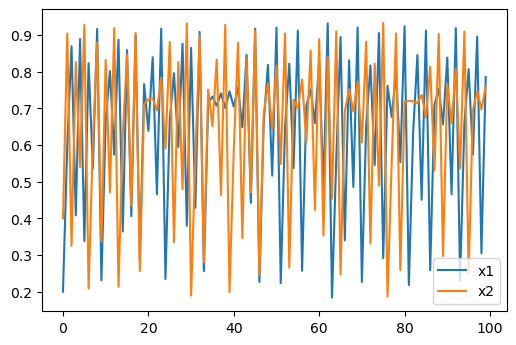

In [4]:
plt.figure(1,dpi=100)

plt.plot(x1,label = "x1")
plt.plot(x2,label = "x2")
plt.legend()
plt.show()

构建x1时间延迟数据集

In [12]:
x_T = pd.DataFrame(x1,columns=['x_T'])
x_2 = pd.DataFrame(x2,columns=['x_2'])
x_T.shape

(100, 1)

In [36]:
x_t = x_T.iloc[0:80,[0]]#原始数据
x_t1 = x_T.iloc[1:81,[0]]
x_t2 = x_T.iloc[2:82,[0]]
x_t3 = x_T.iloc[3:83,[0]]
x_t4 = x_T.iloc[4:84,[0]]
x_t5 = x_T.iloc[5:85,[0]]
x_t6 = x_T.iloc[6:86,[0]]
x_t7 = x_T.iloc[7:87,[0]]
x_t8 = x_T.iloc[8:88,[0]]
x_t9 = x_T.iloc[9:89,[0]]
x_t10 = x_T.iloc[10:90,[0]]

data =  pd.concat([x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
                   x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

data

,x_T,x_T,x_T,x_T,x_T,x_T,x_T,x_T,x_T,x_T,x_T
0,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.599200,0.599200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.869851,0.869851,0.869851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.408160,0.408160,0.408160,0.408160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.889498,0.889498,0.889498,0.889498,0.889498,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
85,NaN,NaN,NaN,NaN,NaN,NaN,0.91257,0.912570,0.912570,0.912570,0.912570
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258393,0.258393,0.258393,0.258393
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.709630,0.709630,0.709630
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.752539,0.752539


In [38]:

x_t2 = x_t2.reset_index(drop=True)
x_t2.columns=['x_T2']
x_t2

,x_T2
0,0.869851
1,0.408160
2,0.889498
3,0.337911
4,0.823743
...,...
75,0.676738
76,0.800437
77,0.553106
78,0.924317


In [10]:
data.to_csv("./xt_xt10.csv",index=0)

In [ ]:
X = x_2.iloc[0:80,[0]]
X.to_csv("./X.csv",index=0)

In [19]:
import pandas as pd
data = pd.read_csv('xt_xt10.csv',encoding='utf-8')
data

,x_2,x_T,x_T1,x_T2,x_T3,x_T4,x_T5,x_T6,x_T7,x_T8,x_T9,x_T10
0,0.400000,0.200000,0.599200,0.869851,0.408160,0.889498,0.337911,0.823743,0.536821,0.917073,0.230999,0.666034
1,0.904800,0.599200,0.869851,0.408160,0.889498,0.337911,0.823743,0.536821,0.917073,0.230999,0.666034,0.801980
2,0.324736,0.869851,0.408160,0.889498,0.337911,0.823743,0.536821,0.917073,0.230999,0.666034,0.801980,0.573870
3,0.826696,0.408160,0.889498,0.337911,0.823743,0.536821,0.917073,0.230999,0.666034,0.801980,0.573870,0.887454
4,0.540128,0.889498,0.337911,0.823743,0.536821,0.917073,0.230999,0.666034,0.801980,0.573870,0.887454,0.364308
...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.933229,0.291362,0.761424,0.676738,0.800437,0.553106,0.924317,0.218023,0.633447,0.845781,0.450729,0.912570
76,0.186241,0.761424,0.676738,0.800437,0.553106,0.924317,0.218023,0.633447,0.845781,0.450729,0.912570,0.258393
77,0.559186,0.676738,0.800437,0.553106,0.924317,0.218023,0.633447,0.845781,0.450729,0.912570,0.258393,0.709630
78,0.904900,0.800437,0.553106,0.924317,0.218023,0.633447,0.845781,0.450729,0.912570,0.258393,0.709630,0.752539


In [24]:
r = data.corr()
r

,x_2,x_T,x_T1,x_T2,x_T3,x_T4,x_T5,x_T6,x_T7,x_T8,x_T9,x_T10
x_2,1.000000,0.109771,0.003467,-0.183682,0.335516,-0.409090,0.470668,-0.412916,0.320410,-0.243675,0.054922,0.107396
x_T,0.109771,1.000000,-0.648755,0.357548,-0.238399,0.006112,0.172591,-0.195937,0.252477,-0.313430,0.248832,-0.173721
x_T1,0.003467,-0.648755,1.000000,-0.678684,0.389560,-0.254493,0.019933,0.160225,-0.203109,0.249476,-0.282599,0.212180
x_T2,-0.183682,0.357548,-0.678684,1.000000,-0.664197,0.357881,-0.226477,-0.012085,0.196463,-0.206918,0.237556,-0.288475
x_T3,0.335516,-0.238399,0.389560,-0.664197,1.000000,-0.656948,0.347918,-0.212008,-0.020932,0.203528,-0.225308,0.267619
x_T4,-0.409090,0.006112,-0.254493,0.357881,-0.656948,1.000000,-0.655357,0.344967,-0.218067,-0.023777,0.226780,-0.254419
x_T5,0.470668,0.172591,0.019933,-0.226477,0.347918,-0.655357,1.000000,-0.653212,0.348547,-0.215684,-0.045797,0.257203
x_T6,-0.412916,-0.195937,0.160225,-0.012085,-0.212008,0.344967,-0.653212,1.000000,-0.657579,0.346247,-0.189944,-0.078072
x_T7,0.320410,0.252477,-0.203109,0.196463,-0.020932,-0.218067,0.348547,-0.657579,1.000000,-0.650408,0.321707,-0.174103
x_T8,-0.243675,-0.313430,0.249476,-0.206918,0.203528,-0.023777,-0.215684,0.346247,-0.650408,1.000000,-0.647107,0.318255


In [31]:
# plt.figure(1,dpi=100)

# plt.plot(r.x_2,label = "r")
# # plt.plot(x2,label = "x2")
# plt.legend()
# plt.show()

In [27]:
list(data)
MIC = []
for var1 in list(data):
        x = data[var1]
        y = data['x_2']
        mine = MINE(alpha = 0.6, c = 15)
        mine.compute_score(x, y)
        MIC.append(mine.mic())
        print(mine.mic())

0.9999999999999996
0.3376768121936275
0.330054756503136
0.36049321630441095
0.38818176775002444
0.45683615241961706
0.3855142317690231
0.3681387624120875
0.3202886087251483
0.2992316287404397
0.28526791579308625
0.28642934751668386


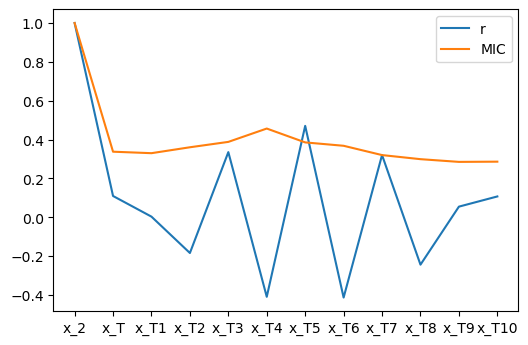

In [29]:
plt.figure(1,dpi=100)

plt.plot(r.x_2,label = "r")
plt.plot(MIC,label = "MIC")
plt.legend()
plt.show()

In [16]:
# data1  = X#获取列名为flow的数据作为新列的数据
# data['time'] = data1 #将新列的名字设置为cha
# data.to_csv(r"xt_xt10.csv",mode = 'a',index =False)
# #mode=a，以追加模式写入,header表示列名，默认为true,index表示行名，默认为true，再次写入不需要行名
# print(data.columns)

In [14]:
np.corrcoef(x1,x2)

array([[ 1.        , -0.04692459],
       [-0.04692459,  1.        ]])

In [21]:
pd.DataFrame(x1,x2)

mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x1, x2)
print(mine.mic())

0.21634307200264355


In [37]:
x3 = pd.DataFrame(x1)


In [41]:
x3 = pd.DataFrame(x1,columns=['a'])

In [42]:
x3

,a
0,0.200000
1,0.599200
2,0.870120
3,0.408846
4,0.891489
...,...
95,0.466309
96,0.917919
97,0.235430
98,0.670281


In [44]:
x_T = x3.iloc[1:3,[0]]
x_T

,a
1,0.59920
2,0.87012
